In [359]:
import sys
sys.path.append("..")

import os
import glob
import numpy as np

%load_ext autoreload
%autoreload 2

from sicm import io
from sicm.utils import utils
from sicm.models.temperature import TemperatureModel
from sicm.models.comsol import ComsolModel, ComsolData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [360]:
datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study7\\results\\_saved\\007"
exp_name = "ecJz" + ".txt"
comd = ComsolData(datadir, exp_name)
comd.data.head()

,rUME (m),d (m),Tsub (K),"Current density, z component (A)","Current density, r component (A)","Current density, phi component (A)"
0,1.000000e-08,1.151042e-09,301.700012,-4.580282e-09,-2.550710e-10,0.0
1,1.000000e-08,1.151042e-09,301.850006,-4.586547e-09,-2.554199e-10,0.0
2,1.000000e-08,1.151042e-09,302.000000,-4.592811e-09,-2.557687e-10,0.0
3,1.000000e-08,1.519467e-09,301.700012,-4.584321e-09,-2.552960e-10,0.0
4,1.000000e-08,1.519467e-09,301.850006,-4.590525e-09,-2.556414e-10,0.0


In [361]:
# datadir = "S:\\UsersData\\Martin\\projects\\thermometry\\comsol\\study5\\results\\_saved\\004"
exp_name = "T_tip" + ".txt"
comt = ComsolData(datadir, exp_name)
comt.data.head()

,rUME (m),d (m),Tsub (K),Temperature (K)
0,1.000000e-08,1.151042e-09,301.700012,301.039734
1,1.000000e-08,1.151042e-09,301.850006,301.161957
2,1.000000e-08,1.151042e-09,302.000000,301.284149
3,1.000000e-08,1.519467e-09,301.700012,301.006500
4,1.000000e-08,1.519467e-09,301.850006,301.127319


In [362]:
T = comd.data["Tsub (K)"].unique()[-2]
r_sub = comd.data["rUME (m)"].unique()
d_pipette = 30e-9
T0 = 298.15

In [363]:
xx = []
yy = []
TT = []
for rr in r_sub:
    dsub = comd.data[(comd.data["Tsub (K)"] == T) & (comd.data["rUME (m)"] == rr)]
    xx.append(dsub["d (m)"].values / d_pipette)
    yy.append(dsub.iloc[:, 3].values / dsub.iloc[-1, 3])

    dsub2 = comt.data[(comt.data["Tsub (K)"] == T) & (comt.data["rUME (m)"] == rr)]
    TT.append(dsub2["Temperature (K)"].values - T0)

In [364]:
tm = TemperatureModel(xx, yy, TT, T0, r_sub/d_pipette, d_pipette)

Saved figure to S:\UsersData\Martin\projects\thermometry\comsol\study7\results\_saved\007\T_tip_T301p85K_d30nm.pdf.


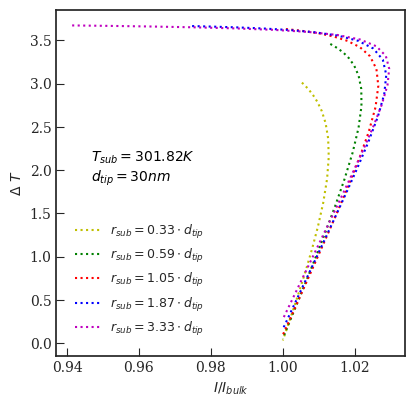

In [367]:
fpath = os.path.join(comt.datadir, comt.name)
suffix = "_T{:.2f}K_d{:.0f}nm".format(T, tm.d_pipette*1e9)
tm.plot(fname = utils.make_fname(fpath, suffix.replace(".", "p")))

Relative (z/d) Validity Threshold = 0.35
Fitting TemperatureModel._fit_wrapper.<locals>._linear_fit to 17 datapoints ...
Found parameters: [ 142.82994997 -142.83105103].
Finished in 0.001 s
error on fit: 2.249563932E+00


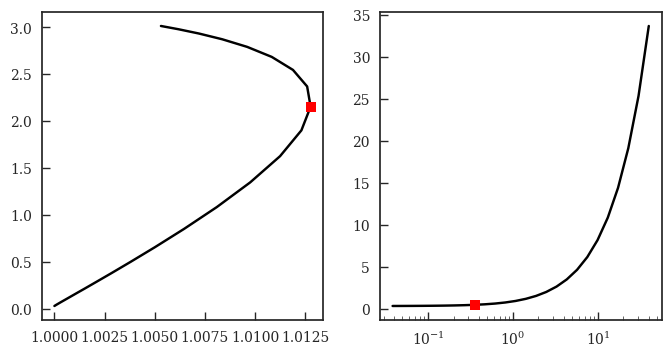

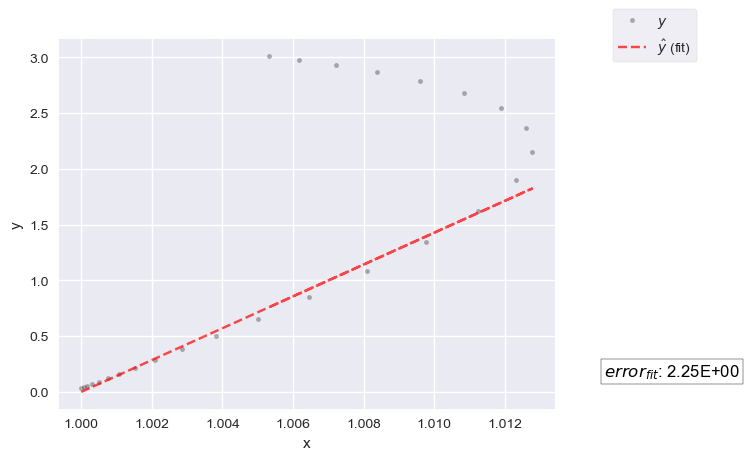

Relative (z/d) Validity Threshold = 0.47
Fitting TemperatureModel._fit_wrapper.<locals>._linear_fit to 16 datapoints ...
Found parameters: [ 108.13126594 -108.09472883].
Finished in 0.001 s
error on fit: 1.355315208E+00


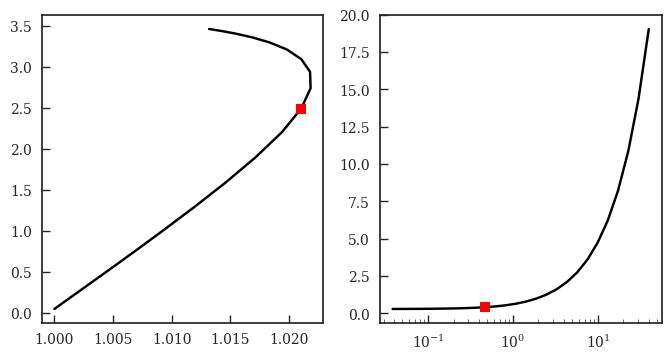

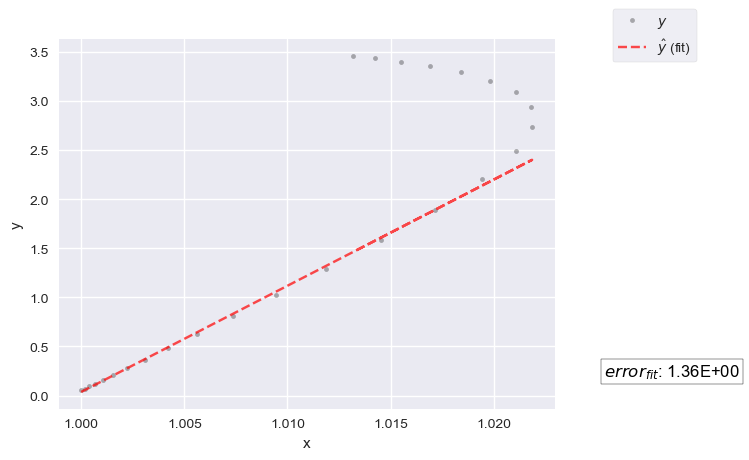

Relative (z/d) Validity Threshold = 0.47
Fitting TemperatureModel._fit_wrapper.<locals>._linear_fit to 16 datapoints ...
Found parameters: [ 98.76359496 -98.69466489].
Finished in 0.001 s
error on fit: 3.513385534E+00


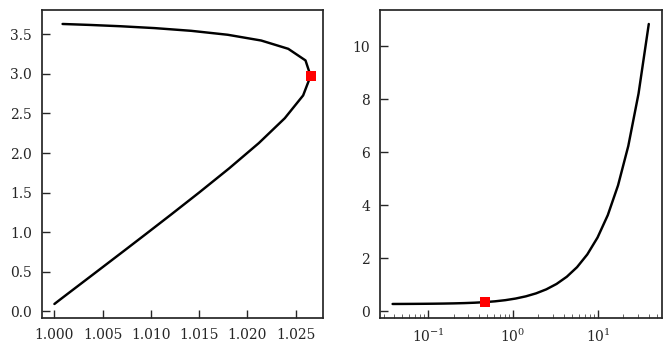

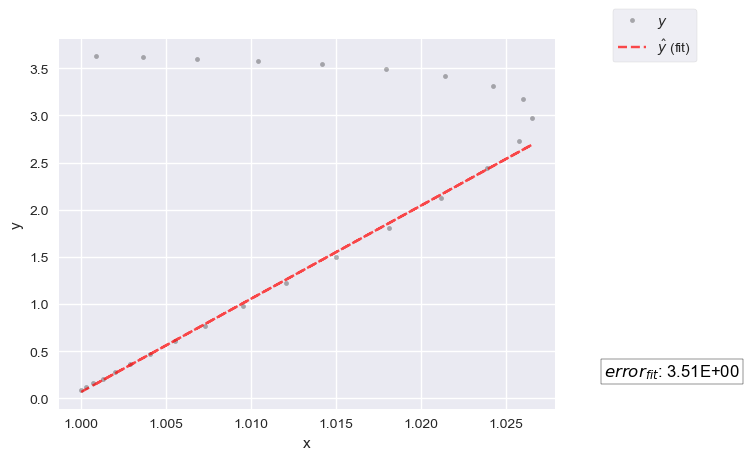

Relative (z/d) Validity Threshold = 1.42
Fitting TemperatureModel._fit_wrapper.<locals>._linear_fit to 12 datapoints ...
Found parameters: [ 89.57327687 -89.41524164].
Finished in 0.001 s
error on fit: 9.198617935E+00


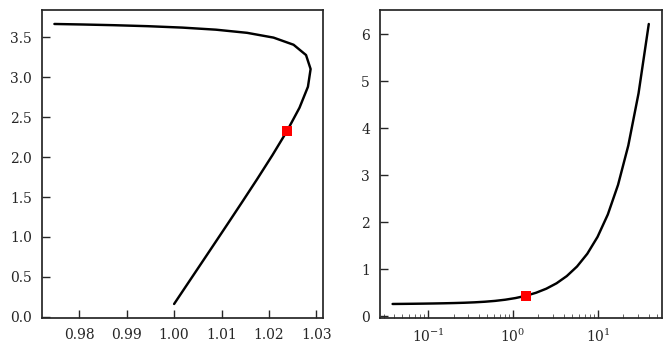

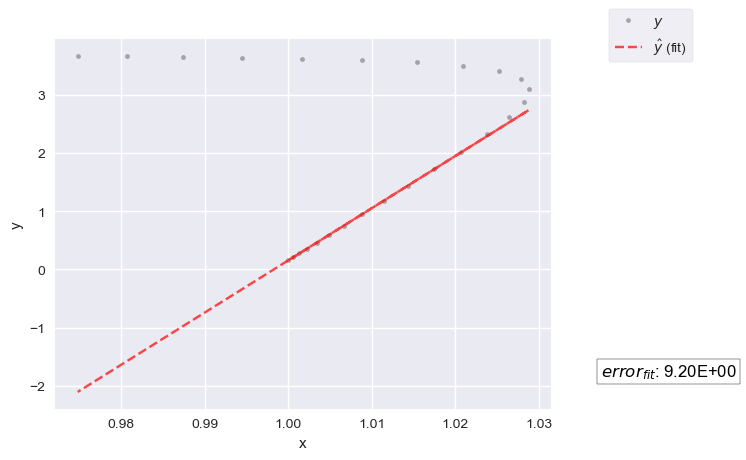

Relative (z/d) Validity Threshold = 1.87
Fitting TemperatureModel._fit_wrapper.<locals>._linear_fit to 11 datapoints ...
Found parameters: [ 87.33054211 -87.05758094].
Finished in 0.001 s
error on fit: 1.861641693E+01


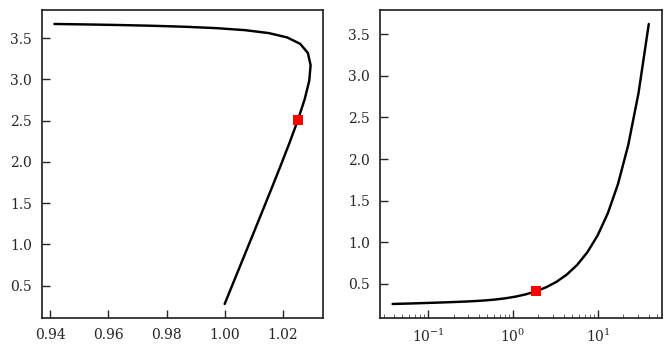

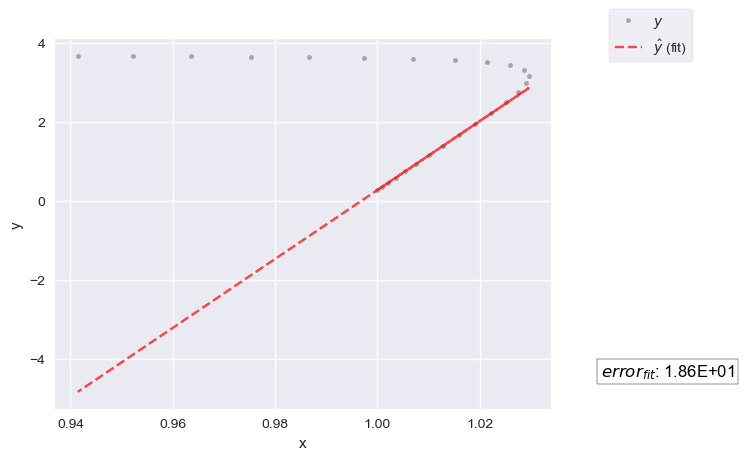

In [371]:
for id in range(len(tm.r_sub)):
    tm.fit(idx = id)

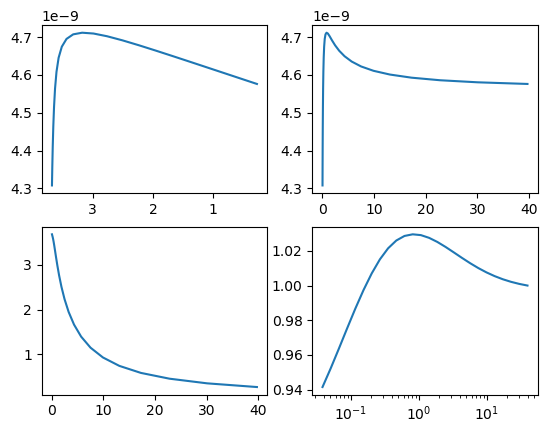

In [249]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2); ax = ax.flatten()
ax[0].plot(dsub2["Temperature (K)"].values - T0 , np.abs(dsub.iloc[:, 3].values))
ax[0].invert_xaxis()
ax[1].plot(dsub["d (m)"].values / d_pipette, np.abs(dsub.iloc[:, 3].values))
ax[2].plot(dsub["d (m)"].values / d_pipette, dsub2["Temperature (K)"].values - T0)
ax[3].plot(dsub["d (m)"].values / d_pipette, dsub.iloc[:, 3].values / dsub.iloc[-1, 3])
ax[3].set_xscale("log")
# plt.yscale('log')
# plt.xscale('log')